### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', encoding='unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
len(data['CustomerID']) #number of total customers

541909

In [7]:
data['Country'].unique() #total number of countries present

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
data['Description'].unique() #total types of purchases

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [9]:
data.isna().sum() #checking missing values in our data 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data['CustomerID'].isna().sum()/len(data['CustomerID']) * 100 #24% missing customer ids

24.926694334288598

In [11]:
data['Description'].isna().sum()/len(data['Description']) * 100 #0.26% missing Descriptions of purchases by customers

0.2683107311375157

In [12]:
data= data[pd.notnull(data['CustomerID'])] #Displaying "not NULL" data as data

In [13]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
data.shape

(406829, 8)

### Droping Duplicates 

In [15]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [16]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [17]:
filtered_data.shape

(4380, 2)

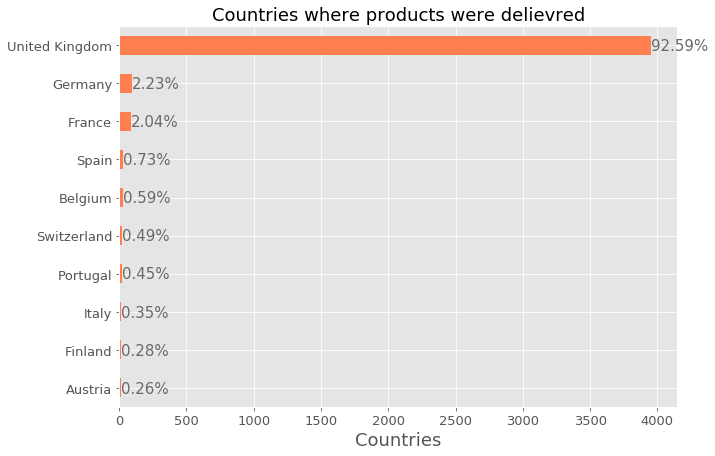

In [24]:
ax = filtered_data['Country'].value_counts()[:10].plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Countries where products were delievred", fontsize=18)
ax.set_xlabel("Countries", fontsize=18);
totals = []


for i in ax.patches:
    totals.append(i.get_width())


total = sum(totals)


for i in ax.patches:
    
    ax.text(i.get_width()+.8, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

ax.invert_yaxis()

### Checking United Kingdom Data specifically 

In [19]:
#Most customers are from UK
uk_data = data[data.Country=='United Kingdom']

In [20]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null object
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
Country        361878 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [21]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null object
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [22]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [23]:
#filtering necessary columns 
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

('1/10/2011 10:32', '9/9/2011 9:52')

In [24]:

PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


### Recency, Frequency and Monetary Analysis (RFM)

In [25]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [26]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [27]:
rfm.columns=['monetary','recency','frequency']

In [28]:
rfm['recency'] = rfm['recency'].astype(int)

In [29]:
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [30]:
#Computing Quantile RFM values
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [31]:
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,1
12747.0,2,103,4196.01,4,1,4
12748.0,0,4596,33719.73,4,1,4
12749.0,3,199,4090.88,4,1,4
12820.0,3,59,942.34,3,2,4


In [32]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
12747.0,2,103,4196.01,4,1,4,414
12748.0,0,4596,33719.73,4,1,4,414
12749.0,3,199,4090.88,4,1,4,414
12820.0,3,59,942.34,3,2,4,324


In [33]:
#Who are the best customers?
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
16754.0,372,2,2002.4,1,1,1,111
12346.0,325,1,77183.6,1,1,1,111
15749.0,235,10,44534.3,1,1,1,111
16698.0,226,5,1998.0,1,1,1,111
13135.0,196,1,3096.0,1,1,1,111


### Looking at our original Data Set

In [34]:
orig_data = data.copy()

In [35]:
#EDA of the dataset 
orig_data['Amount'] = orig_data['Quantity'] * orig_data['UnitPrice']

In [36]:
orig_data['Dates'] = pd.to_datetime(orig_data['InvoiceDate']).dt.date
orig_data['Time'] = pd.to_datetime(orig_data['InvoiceDate']).dt.time

In [37]:
orig_data['Year'] = pd.to_datetime(orig_data['Dates']).dt.year
orig_data['Month'] = pd.to_datetime(orig_data['Dates']).dt.month
orig_data['Day'] = pd.to_datetime(orig_data['Dates']).dt.dayofweek

In [39]:
orig_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Dates,Time,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2


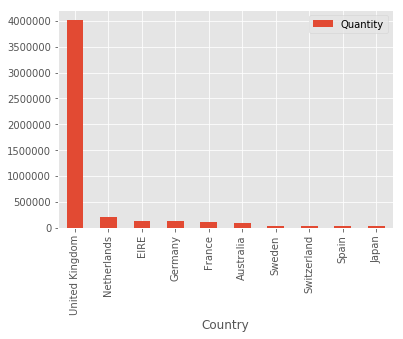

In [40]:
orig_data.groupby('Country')[['Quantity']].sum().sort_values(by='Quantity', ascending=False)[:10].plot(kind='bar')

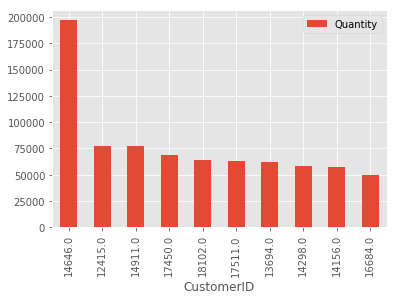

In [41]:
orig_data.groupby(['CustomerID'])[['Quantity']].sum().sort_values(by='Quantity', ascending=False).iloc[:10,:].plot(kind='bar')

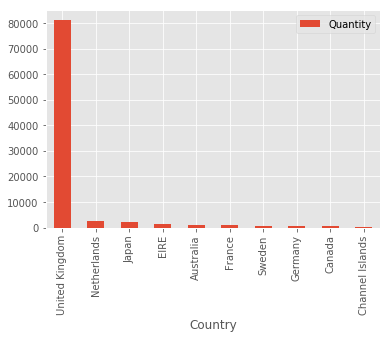

In [42]:
orig_data.groupby(['Country'])[['Quantity']].max().sort_values(by='Quantity',ascending=False).iloc[:10, :].plot(kind='bar')

In [43]:
orig_data = orig_data.loc[orig_data.Country=='United Kingdom']
orig_data = orig_data.loc[orig_data.Quantity>0]
orig_data.groupby(['StockCode'])[['Quantity']].max().sort_values(by='Quantity')

,Quantity
StockCode,
90025A,1
77079,1
90205C,1
84551,1
84562A,1
21414,1
90141C,1
84569C,1
37461,1


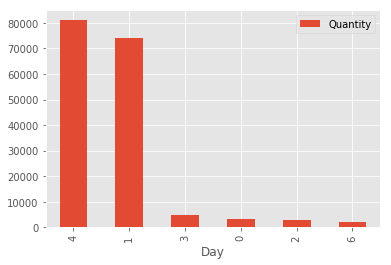

In [44]:
# orig_data.groupby(['Day']).agg({'Quantity':np.max}).reset_index(drop=True)
orig_data.groupby(['Day'])[['Quantity']].max().sort_values(by='Quantity',ascending=False).iloc[:10, :].plot(kind='bar')

In [45]:
orig_data.groupby(['Day'])[['Country']].max().sort_values(by='Country',ascending=False)

,Country
Day,
0,United Kingdom
1,United Kingdom
2,United Kingdom
3,United Kingdom
4,United Kingdom
6,United Kingdom


### Splitting the data into two years 2010 and 2011

In [46]:
year2010 = orig_data[orig_data['Year'] == 2010]  #creating a dataframe with all the rows for the year 2010

In [47]:
year2010.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Dates,Time,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2


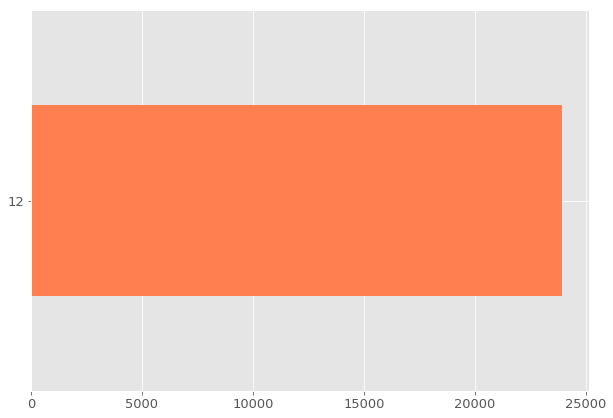

In [48]:
#checking the count of different months present in year 2010
ax = year2010['Month'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);

In [49]:
year2011 = orig_data[orig_data['Year'] == 2011] #in the same way creating a dataframe of values of the year 2011

In [50]:
year2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Dates,Time,Year,Month,Day
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom,19.5,2011-01-04,10:00:00,2011,1,1
42482,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,1
42483,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,1
42484,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom,10.5,2011-01-04,10:00:00,2011,1,1
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom,12.5,2011-01-04,10:00:00,2011,1,1


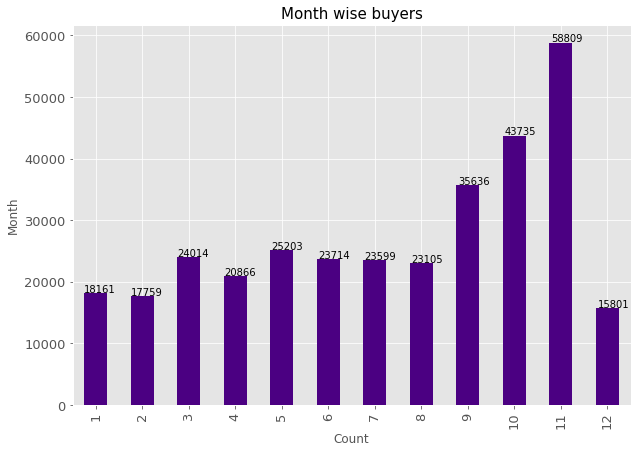

In [51]:
#checking monthly buyers in the year 2011
ax = year2011['Month'].value_counts(sort=False).plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Month wise buyers", fontsize=15)
ax.set_xlabel("Count")
ax.set_ylabel("Month")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height()* 1.005))
    #RESULT --month 11 (november) as most shoppers

In [52]:
year2011['Month'].value_counts()#displaying the total counts of each month

11    58809
10    43735
9     35636
5     25203
3     24014
6     23714
7     23599
8     23105
4     20866
1     18161
2     17759
12    15801
Name: Month, dtype: int64

### Delievery Data

In [53]:
PostageData = data.loc[data['StockCode'] == 'POST'] #displaying results who preffered POSTAGE of their items

In [54]:
PostageData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France


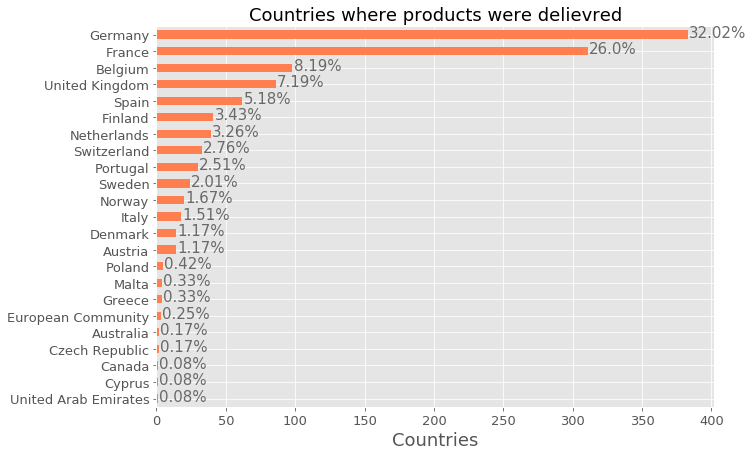

In [55]:
ax = PostageData['Country'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Countries where products were delievred", fontsize=18)
ax.set_xlabel("Countries", fontsize=18);
totals = []


for i in ax.patches:
    totals.append(i.get_width())


total = sum(totals)


for i in ax.patches:
    
    ax.text(i.get_width()+.8, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

ax.invert_yaxis()

#percentage of countries where products were delivered.